In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Charger les datasets train et test

In [2]:
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# 2. Création de X_train, Y_train, X_test, Y_test

In [3]:
Y_train = pd.DataFrame(train_data['5'])
train_data.drop('5', axis=1, inplace=True)
X_train = train_data

Y_test = pd.DataFrame(test_data['7'])
test_data.drop('7', axis=1, inplace=True)
X_test = test_data

# 3. Affichage du premier chiffre (1ère observation)

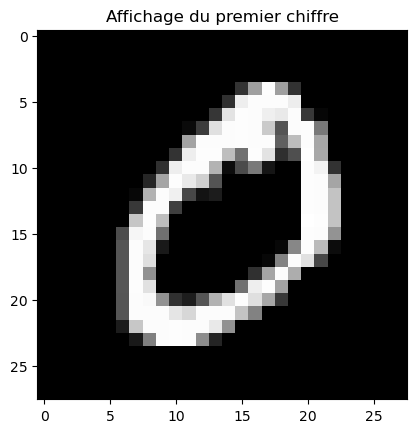

In [4]:
obs = X_train.iloc[0, :].values.reshape(28, 28)
plt.imshow(obs, cmap='gray')
plt.title('Affichage du premier chiffre')
plt.show()

In [5]:
#les noms des colonnes des deux datasets n'étant pas les mêmes, je les renomme de manière à ne pas avoir d'erreur dans la suite
X_train.columns = range(len(X_train.columns))
X_test.columns = range(len(X_test.columns))

Y_train.columns = range(len(Y_train.columns))
Y_test.columns = range(len(Y_test.columns))

# 4. Création d'un sample d'entraînement de 12k observations et d'un sample test de 500 observations

In [6]:
random_state_train = np.random.randint(1, 1000)
random_state_test = np.random.randint(1, 1000)

sample_X_train = X_train.sample(n=12000, random_state=random_state_train)
sample_Y_train = Y_train.sample(n=12000, random_state=random_state_train)
sample_Y_train = sample_Y_train.values.ravel()

sample_X_test = X_test.sample(n=500, random_state=random_state_test)
sample_Y_test = Y_test.sample(n=500, random_state=random_state_test)
sample_Y_test = sample_Y_test.values.ravel()

# 5. Test KNN avec k = 10

In [7]:
knn = KNeighborsClassifier(10)
knn.fit(sample_X_train, sample_Y_train)
predictions = knn.predict(sample_X_test)

# 6. Affichage matrice de confusion et erreur de classification 

Erreur de Classification: 0.050000000000000044


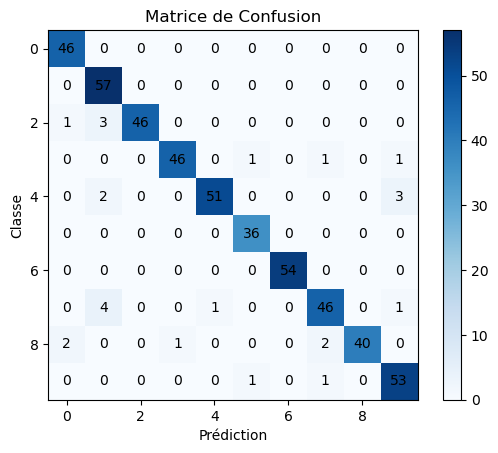

In [8]:
matrice_confusion = confusion_matrix(sample_Y_test, predictions)
erreur_classification = 1 - accuracy_score(sample_Y_test, predictions)

print("Erreur de Classification:", erreur_classification)

plt.imshow(matrice_confusion, interpolation='nearest', cmap=plt.cm.Blues)

for i in range(matrice_confusion.shape[0]):
    for j in range(matrice_confusion.shape[1]):
        plt.text(j, i, str(matrice_confusion[i, j]), ha='center', va='center', color='black')

plt.title('Matrice de Confusion')
plt.colorbar()
plt.xlabel('Prédiction')
plt.ylabel('Classe')
plt.show()

# Affichage des observations mal classées par l'algo KNN

In [9]:
mal_classés = np.where(sample_Y_test != predictions)
print(f"{len(mal_classés[0])} observations mal classées dans l'ensemble test")

25 observations mal classées dans l'ensemble test


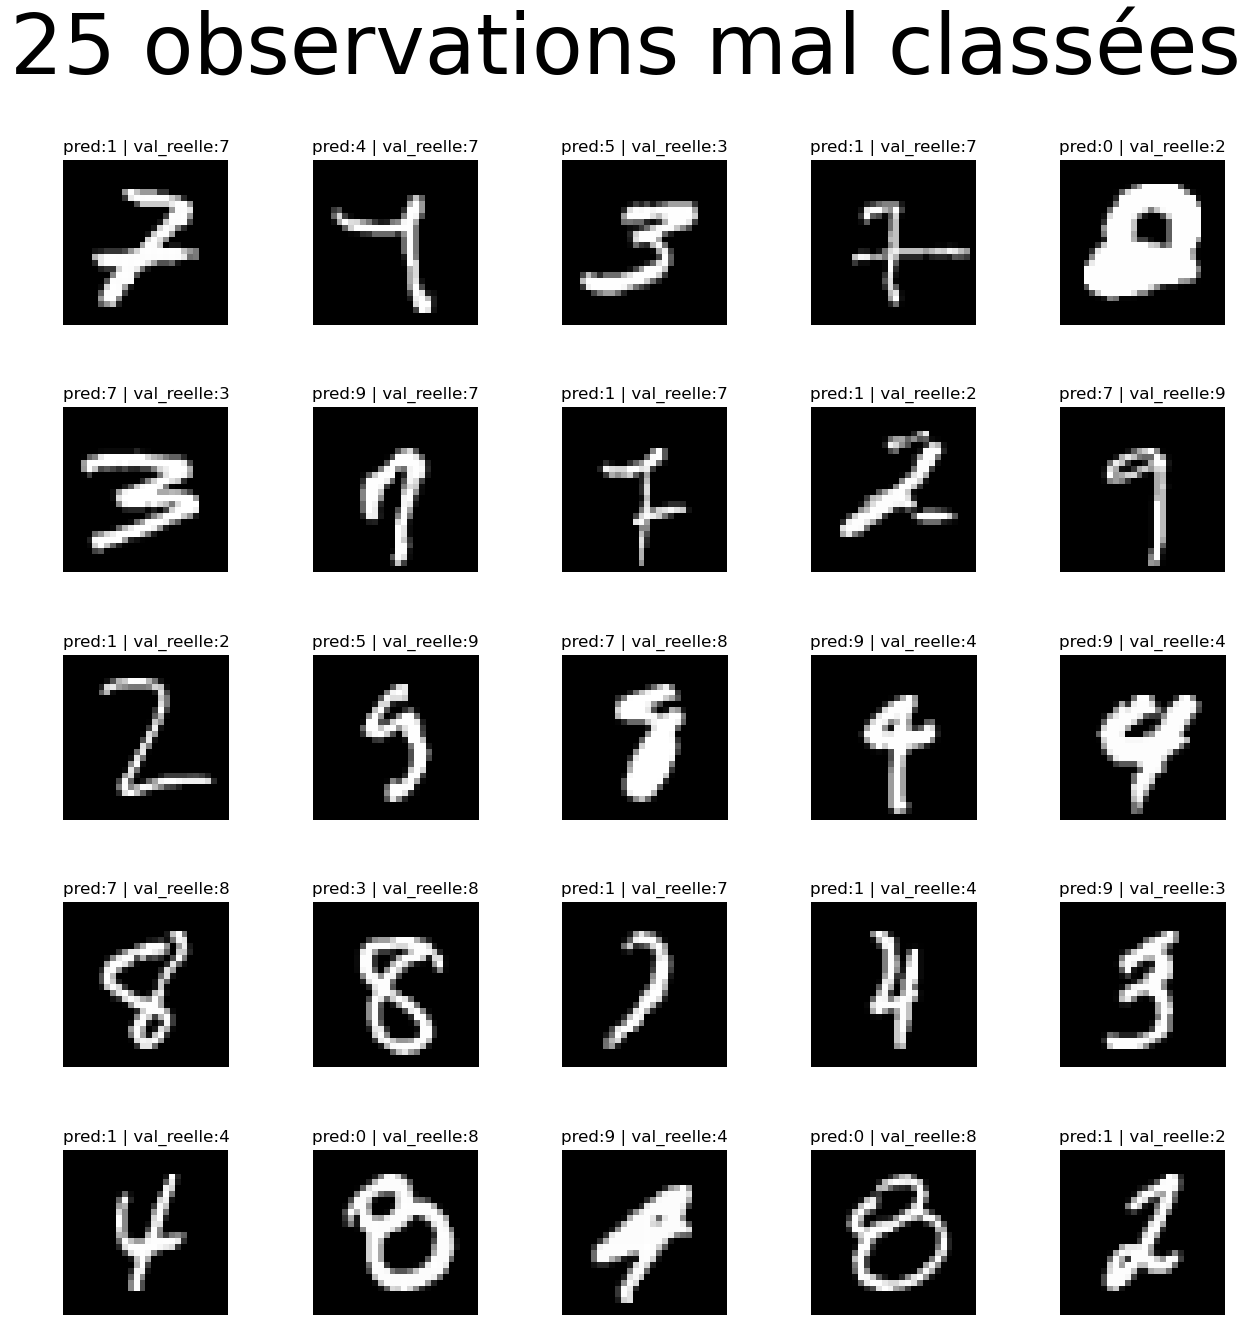

In [10]:
def afficher_obs(i, predictions):
    nb_img = len(i)
    nb_cols = 5
    nb_rows = (nb_img // nb_cols) + (nb_img%nb_cols > 0)

    fig, axes = plt.subplots(nb_rows, nb_cols, figsize=(15, 3 * nb_rows))

    for i, ax in zip(i, axes.ravel()):
        obs = sample_X_test.iloc[i, :].values.reshape(28, 28)
        ax.imshow(obs, cmap='gray')
        ax.set_title(f"pred:{predictions[i]} | val_reelle:{sample_Y_test[i]}")
        ax.axis('off')

    plt.suptitle(f"{nb_img} observations mal classées", fontsize=60)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

afficher_obs(mal_classés[0], predictions)

In [11]:
#poids en fonction de la distance
knn_poids_dist = KNeighborsClassifier(1, weights='distance')
knn_poids_dist.fit(sample_X_train, sample_Y_train)
pred_dist = knn_poids_dist.predict(sample_X_test)

Erreur de Classification: 0.038000000000000034


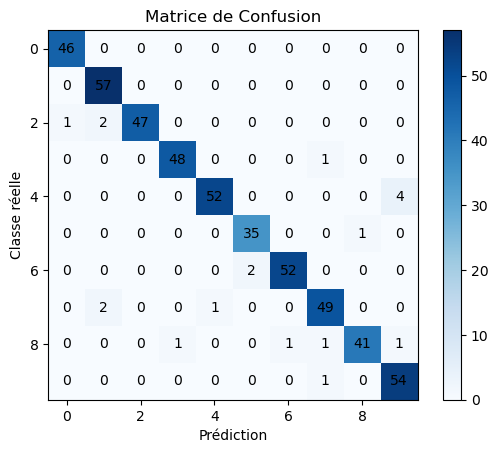

In [12]:
matrice_confusion = confusion_matrix(sample_Y_test, pred_dist)
erreur_classification = 1 - accuracy_score(sample_Y_test, pred_dist)

print("Erreur de Classification:", erreur_classification)

plt.imshow(matrice_confusion, interpolation='nearest', cmap=plt.cm.Blues)

for i in range(matrice_confusion.shape[0]):
    for j in range(matrice_confusion.shape[1]):
        plt.text(j, i, str(matrice_confusion[i, j]), ha='center', va='center', color='black')

plt.title('Matrice de Confusion')
plt.colorbar()
plt.xlabel('Prédiction')
plt.ylabel('Classe réelle')
plt.show()

# PARTIE PERSO

# Estimation du meilleur modèle par validation croisée

In [13]:
meilleure_moy, meilleur_k = 0, 0
k_fold = KFold(n_splits=5, shuffle=True, random_state=np.random.randint(1, 1000))

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    val_croisee = cross_val_score(knn, sample_X_train, sample_Y_train, cv=k_fold, scoring='accuracy')
    if val_croisee.mean()>=meilleure_moy:
        meilleure_moy=val_croisee.mean()
        meilleur_k = k

print('meilleur k:', meilleur_k, 'precision:', meilleure_moy)

meilleur k: 1 precision: 0.9516666666666665


# Test meilleur modèle KNN (k = 1)

In [14]:
knn = KNeighborsClassifier(1)
knn.fit(sample_X_train, sample_Y_train)
predictions = knn.predict(sample_X_test)

Erreur de Classification: 0.038000000000000034


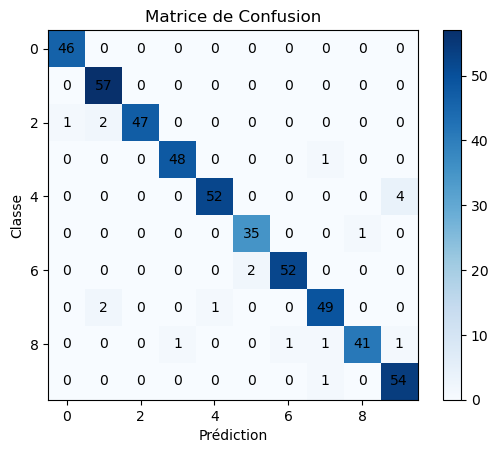

In [15]:
matrice_confusion = confusion_matrix(sample_Y_test, predictions)
erreur_classification = 1 - accuracy_score(sample_Y_test, predictions)

print("Erreur de Classification:", erreur_classification)

plt.imshow(matrice_confusion, interpolation='nearest', cmap=plt.cm.Blues)

for i in range(matrice_confusion.shape[0]):
    for j in range(matrice_confusion.shape[1]):
        plt.text(j, i, str(matrice_confusion[i, j]), ha='center', va='center', color='black')

plt.title('Matrice de Confusion')
plt.colorbar()
plt.xlabel('Prédiction')
plt.ylabel('Classe')
plt.show()

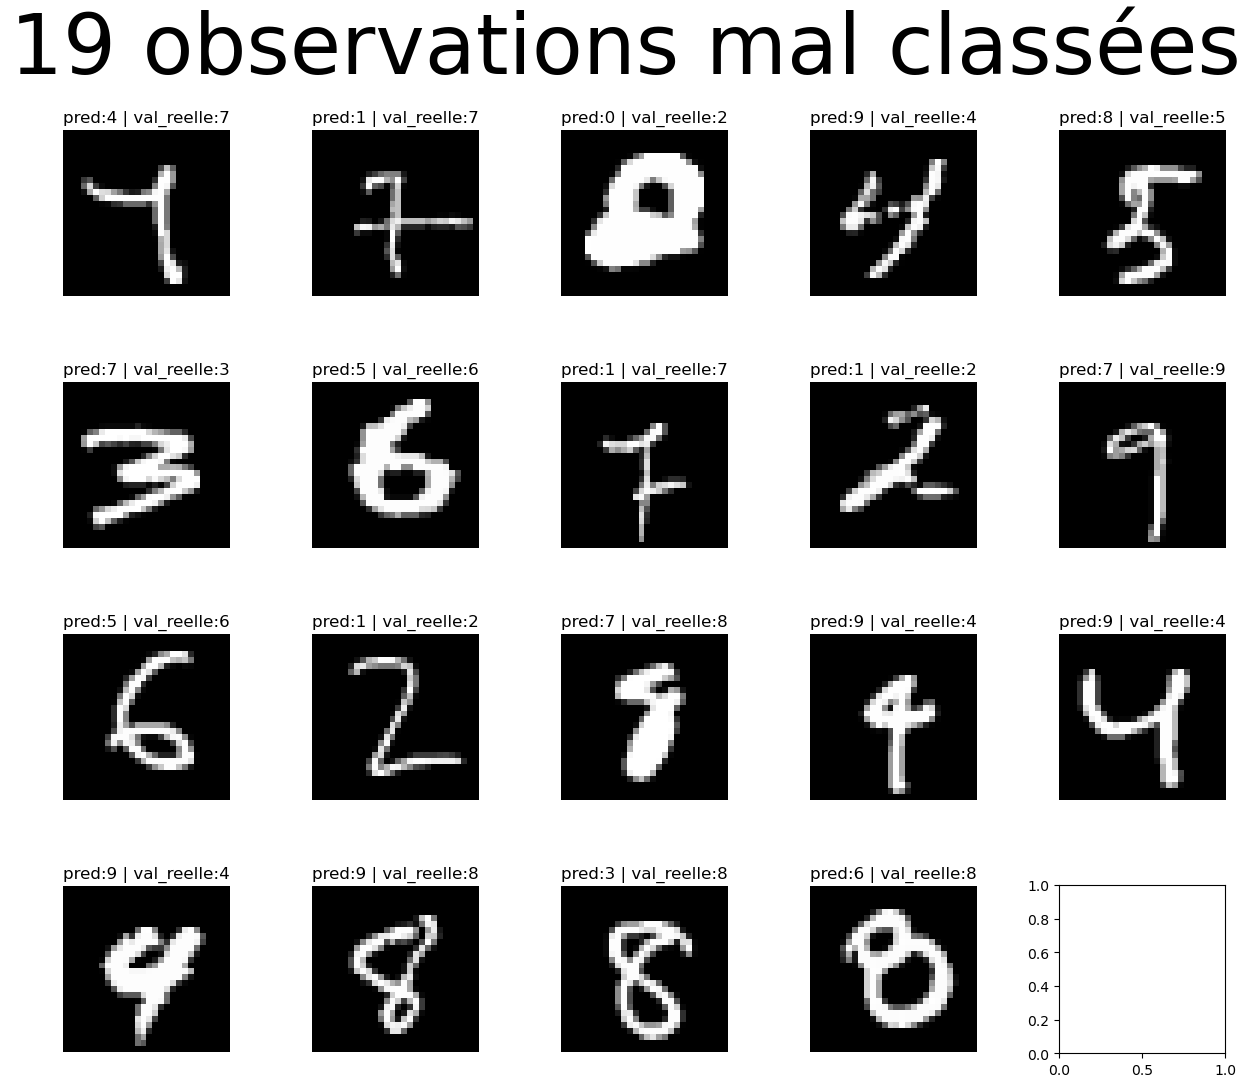

In [16]:
mal_classés = np.where(sample_Y_test != predictions)
afficher_obs(mal_classés[0], predictions)

# Modification des poids

Aucun intérêt de modifier le poids dans le cas k=1. 

# Modification des métriques

# Distance de Manhattan 

In [20]:
knn_manhattan = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_manhattan.fit(sample_X_train, sample_Y_train)
pred_manhattan = knn_manhattan.predict(sample_X_test)

Erreur de Classification: 0.05400000000000005


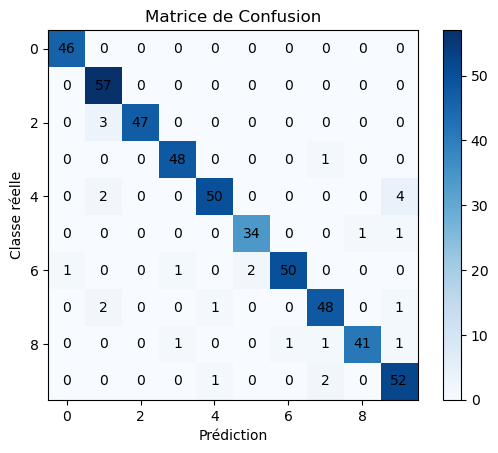

In [21]:
matrice_confusion = confusion_matrix(sample_Y_test, pred_manhattan)
erreur_classification = 1 - accuracy_score(sample_Y_test, pred_manhattan)

print("Erreur de Classification:", erreur_classification)

plt.imshow(matrice_confusion, interpolation='nearest', cmap=plt.cm.Blues)

for i in range(matrice_confusion.shape[0]):
    for j in range(matrice_confusion.shape[1]):
        plt.text(j, i, str(matrice_confusion[i, j]), ha='center', va='center', color='black')

plt.title('Matrice de Confusion')
plt.colorbar()
plt.xlabel('Prédiction')
plt.ylabel('Classe réelle')
plt.show()

# Distance de Chebyshev

In [22]:
knn_chebyshev = KNeighborsClassifier(n_neighbors=1, metric='chebyshev')
knn_chebyshev.fit(sample_X_train, sample_Y_train)
pred_chebyshev = knn_chebyshev.predict(sample_X_test)

Erreur de Classification: 0.246


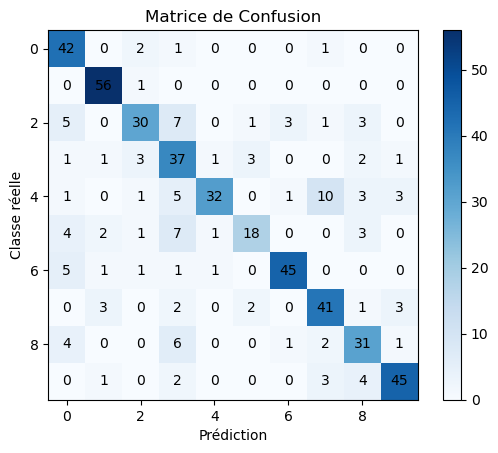

In [23]:
matrice_confusion = confusion_matrix(sample_Y_test, pred_chebyshev)
erreur_classification = 1 - accuracy_score(sample_Y_test, pred_chebyshev)

print("Erreur de Classification:", erreur_classification)

plt.imshow(matrice_confusion, interpolation='nearest', cmap=plt.cm.Blues)

for i in range(matrice_confusion.shape[0]):
    for j in range(matrice_confusion.shape[1]):
        plt.text(j, i, str(matrice_confusion[i, j]), ha='center', va='center', color='black')

plt.title('Matrice de Confusion')
plt.colorbar()
plt.xlabel('Prédiction')
plt.ylabel('Classe réelle')
plt.show()

# Distance de Minkowski 

In [24]:
knn_minkowski = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=3)
knn_minkowski.fit(sample_X_train, sample_Y_train)
pred_minkowski = knn_minkowski.predict(sample_X_test)

Erreur de Classification: 0.03600000000000003


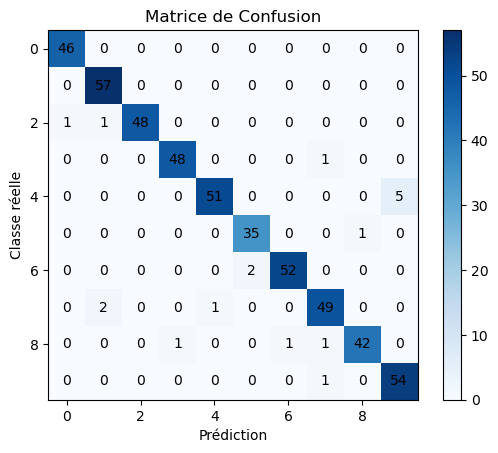

In [25]:
matrice_confusion = confusion_matrix(sample_Y_test, pred_minkowski)
erreur_classification = 1 - accuracy_score(sample_Y_test, pred_minkowski)

print("Erreur de Classification:", erreur_classification)

plt.imshow(matrice_confusion, interpolation='nearest', cmap=plt.cm.Blues)

for i in range(matrice_confusion.shape[0]):
    for j in range(matrice_confusion.shape[1]):
        plt.text(j, i, str(matrice_confusion[i, j]), ha='center', va='center', color='black')

plt.title('Matrice de Confusion')
plt.colorbar()
plt.xlabel('Prédiction')
plt.ylabel('Classe réelle')
plt.show()

On observe que dans notre cas la distance de Minkowski est légèrement plus efficace que celle de Manhattan, tandis que la distance de Chebyshev est totalement inutile.